### Future XRISM observations of an X-ray binary

In order to study the dust in the spectra of X-ray binaries we want to analyze the dust with a dedicated model. This model is called amol and contains the edges of lab measurements of interstellar dust analogues, which were converted to interstellar dust models. 

In this example we use the spectrum of an X-ray binary on high extinction sightline to explore the possibilties of XRISM by investigating the Fe K edge.

In [1]:
from pyspex import spex
s=spex.Session()

 Welcome idies to SPEX version 3.07.03

 NEW in this version of SPEX: 
01-12-2022 Fixed issue with plot cap command
05-12-2022 Fixed issue with knak model
22-03-2023 Fixed issue with treatment of bad quality bins in trafo
23-03-2023 Fixed small issues in the pyspex interface

 Currently using SPEXACT version 2.07.00. Type `help var calc` for details.


In [2]:
s.data('spectra/simxrism100ks.res','spectra/simxrism100ks.spo')

0

Plot the spectra

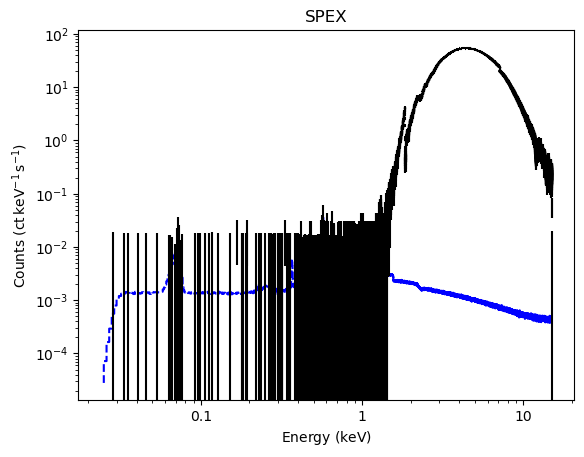

In [3]:
plt = s.plot_data(xlog=True, ylog=True, show=True)

We can now start with ignoring some of the data.

In [4]:
s.ignore(1, 1, 10.0, 1e4, 'kev')
s.ignore(1, 1, 1e-4, 1.3, 'kev')

Plot the region around the Fe K edge 

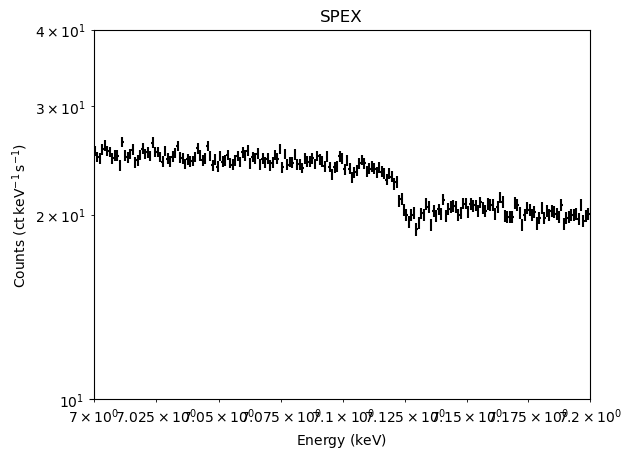

In [5]:
(pdata, plt) = s.plot_data(xlog=True, ylog=True, show=False)
plt.xlim(7.0,7.2)
plt.ylim(10.,40.)
plt.show()

We can now start to define models to fit the X-ray binary

In [6]:
s.com('bb')
s.com('po')

 You have defined    1 component.
 You have defined    2 components.


In [7]:
s.com('hot')

 You have defined    3 components.


In [8]:
import numpy
s.com_rel(1, 1, numpy.array([3]))
s.com_rel(1, 2, numpy.array([3]))

Define the distance:

In [9]:
s.dist(1, 11.0, 'kpc')

 Distances assuming H0 =  70.0 km/s/Mpc, Omega_m = 0.300 Omega_Lambda = 0.700 Omega_r = 0.000
Sector       m      A.U.        ly        pc       kpc       Mpc  redshift        cz   age(yr)
----------------------------------------------------------------------------------------------
   1 3.394E+20 2.269E+09 3.588E+04 1.100E+04   11.0000 1.100E-02    0.0000       0.8 3.588E+04
----------------------------------------------------------------------------------------------



In [10]:
s.command('model show')

--------------------------------------------------------------------------------
 Number of sectors         :     1
 Sector:    1 Number of model components:     3
    Nr.    1: bb  [3 ]
    Nr.    2: pow [3 ]
    Nr.    3: hot


0

We now need to set some values for the model. 

In [11]:
s.par(1, 1, 't', 1.2, thawn=True)
s.par(1, 1, 'n', 1.e-6, thawn=True)
s.par(1, 2, 'n', 755, thawn = False)
s.par(1, 2, 'gamm', 2.3, thawn = True)
s.par(1, 3, 'nh', 0.2, thawn = True)
s.par(1, 3, 't', 1e-6, thawn = False)

In [12]:
s.calc()

Check this first guess

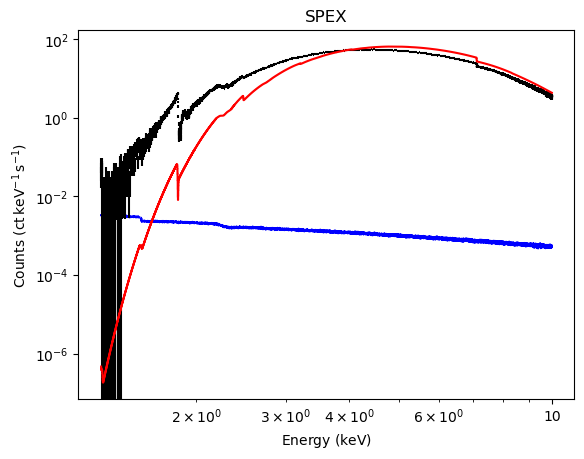

In [13]:
plt = s.plot_data(xlog=True, ylog=True, show=True)

Fit the continuum:

In [14]:
s.fit()
print(s.fit_cstat())

 fit iter  100                                                   
  2.783038E+06          5  1.000E-06   1.20       2.30      0.200
 You cannot plot this frame since nothing is defined
 
  1.101664E+06         11  9.136E-07   1.17       2.39      0.177
 You cannot plot this frame since nothing is defined
 
   43633.6             16  5.317E-07   1.15       2.29      0.131
 You cannot plot this frame since nothing is defined
 
   41299.2             22  4.323E-07   1.21       2.33      0.129
 You cannot plot this frame since nothing is defined
 
   37331.8             27  4.165E-07   1.25       2.39      0.127
 You cannot plot this frame since nothing is defined
 
   37133.2             32  4.204E-07   1.25       2.39      0.127
 You cannot plot this frame since nothing is defined
 
--------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit     value      status    minimum   maximum lsec lcom lpar

   1

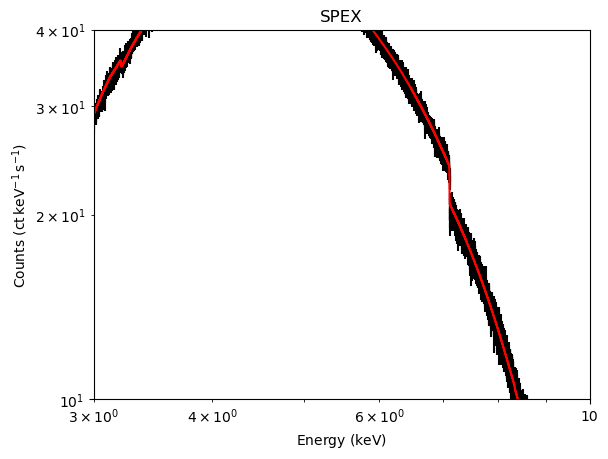

In [15]:
(pdata, plt) = s.plot_data(xlog=True, ylog=True, show=False)
plt.xlim(3.0,10)
plt.ylim(10.,40.)
plt.show()

We now set the depletion values for the cold hot model: 

In [16]:
s.par(1, 3, '08', 0.7, thawn = True)
s.par(1, 3, '12', 0.1, thawn = True)
s.par(1, 3, '14', 0.1, thawn = True)
s.par(1, 3, '26', 0.1, thawn = True)
s.par_free(1, 3, '08')
s.command('par 1 3 08 range 0.58 0.98')
s.command('par 1 3 12 range 0.05 0.98')
s.command('par 1 3 14 range 0.04 0.59')
s.command('par 1 3 26 range 0.03 0.30')

0

Then we add the amol model:

In [17]:
s.com('amol')
s.com_rel(1, 1, numpy.array([3,4]))
s.com_rel(1, 2, numpy.array([3,4]))

 You have defined    4 components.


We set some initial values for the dust. We will focus on the Fe K edge, 
so for this exercise it is important to select dust models with an Fe K edge. 
For example: 4231 (crystalline olivine), 4233 (amorphous pyroxene) or 2230 
(troilite:iron sulfate). 

In [18]:
s.par(1, 4, 'i1', 4231, thawn = False)
s.par(1, 4, 'n1', 1e-7, thawn = True)
s.par(1, 4, 'i2', 4233 , thawn = False)
s.par(1, 4, 'n2', 1e-7, thawn = True)
s.par(1, 4, 'i3', 2230 , thawn = False)
s.par(1, 4, 'n3', 1e-7, thawn = True)
s.calc()

In [19]:
s.fit()
print(s.fit_cstat())

 fit iter  100                                                   
  3.305718E+06         12  4.202E-07   1.25       2.39      0.127      0.700
                0.100      0.100      0.100      1.000E-07  1.000E-07  1.000E-07
 You cannot plot this frame since nothing is defined
 
   34252.3             25  3.974E-07   1.27       2.40      0.101      0.580
                0.980      4.000E-02  0.218      2.040E-06  4.344E-06  8.311E-07
 You cannot plot this frame since nothing is defined
 
   12548.2             37  4.784E-07   1.18       2.31      7.299E-02  0.580
                0.980      4.000E-02  4.933E-02  4.992E-06  5.099E-06  1.668E-07
 You cannot plot this frame since nothing is defined
 
   8805.65             49  5.032E-07   1.18       2.32      7.053E-02  0.580
                0.980      4.000E-02  3.000E-02  5.643E-06  4.517E-06  1.151E-07
 You cannot plot this frame since nothing is defined
 
   8694.65             61  5.013E-07   1.19       2.32      7.145E-02  0.580
 

Inspect the Fe K edge

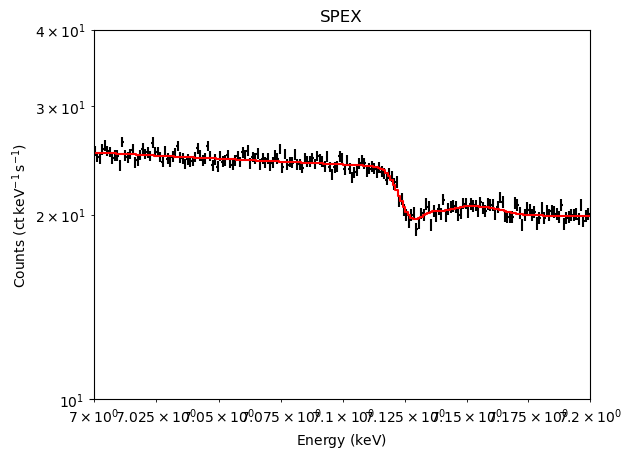

In [20]:
(pdata, plt) = s.plot_data(xlog=True, ylog=True, show=False)
plt.xlim(7.0,7.2)
plt.ylim(10.,40.)
plt.show()

Did you obtain a good fit with these models for the Fe K edge? Do all the models fit?